# Avoid overfit
- [link](https://www.kaggle.com/c/dont-overfit-ii/overview)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
train = pd.read_csv('datasets/dont_overfit/train.csv',encoding='utf-8')
test = pd.read_csv('datasets/dont_overfit/test.csv',encoding='utf-8')

### train

In [5]:
train = train.drop(['id'],axis=1)
tr = train.drop(['target'],axis = 1)
print(train.shape)
train.head()

(250, 301)


,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,-0.624,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,-0.118,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,-0.656,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643


### test

In [6]:
print(test.shape)
test.head()

(19750, 301)


,id,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,250,-0.677,1.721,-0.745,-0.838,0.149,-1.138,0.242,0.504,-1.829,...,-1.180,-0.403,0.759,-0.600,0.951,-0.349,0.446,-0.819,-0.277,1.297
1,251,-0.731,-0.251,0.059,0.054,1.149,2.462,0.836,0.719,-2.269,...,1.297,1.114,0.657,0.760,0.899,-1.612,-1.701,1.107,-0.314,-0.641
2,252,1.119,1.036,1.220,1.518,0.265,-0.088,0.245,-0.533,-0.921,...,-0.864,-0.736,0.367,0.154,0.830,-1.352,0.914,0.377,0.588,-0.912
3,253,-0.933,0.212,-0.053,0.570,-1.540,-1.108,0.462,1.022,-0.215,...,0.063,-0.958,0.762,-0.213,-2.171,0.830,1.435,0.125,2.782,0.619
4,254,-0.208,-0.556,2.641,0.853,-0.384,0.312,0.514,0.481,-1.929,...,-0.689,0.213,0.568,-0.935,-0.015,0.267,0.739,1.340,-0.178,1.010


---
## Data exploration

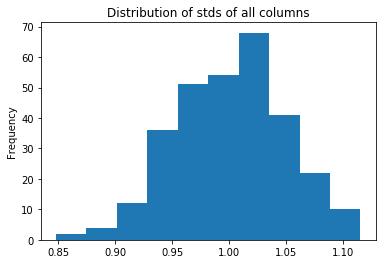

In [7]:
tr.std().plot(kind ='hist')
plt.title('Distribution of stds of all columns')
plt.show()

In [10]:
print(tr.std().min(),tr.std().max())

0.8478573831444829 1.1153389424791198


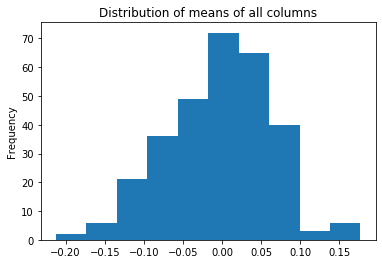

In [11]:
tr.mean().plot(kind ='hist')
plt.title('Distribution of means of all columns')
plt.show()

In [12]:
print(tr.mean().min(),tr.mean().max())

-0.21223999999999998 0.1767200000000001


In [13]:
train.isnull().any().any()

False

Distribution of first 28 columns


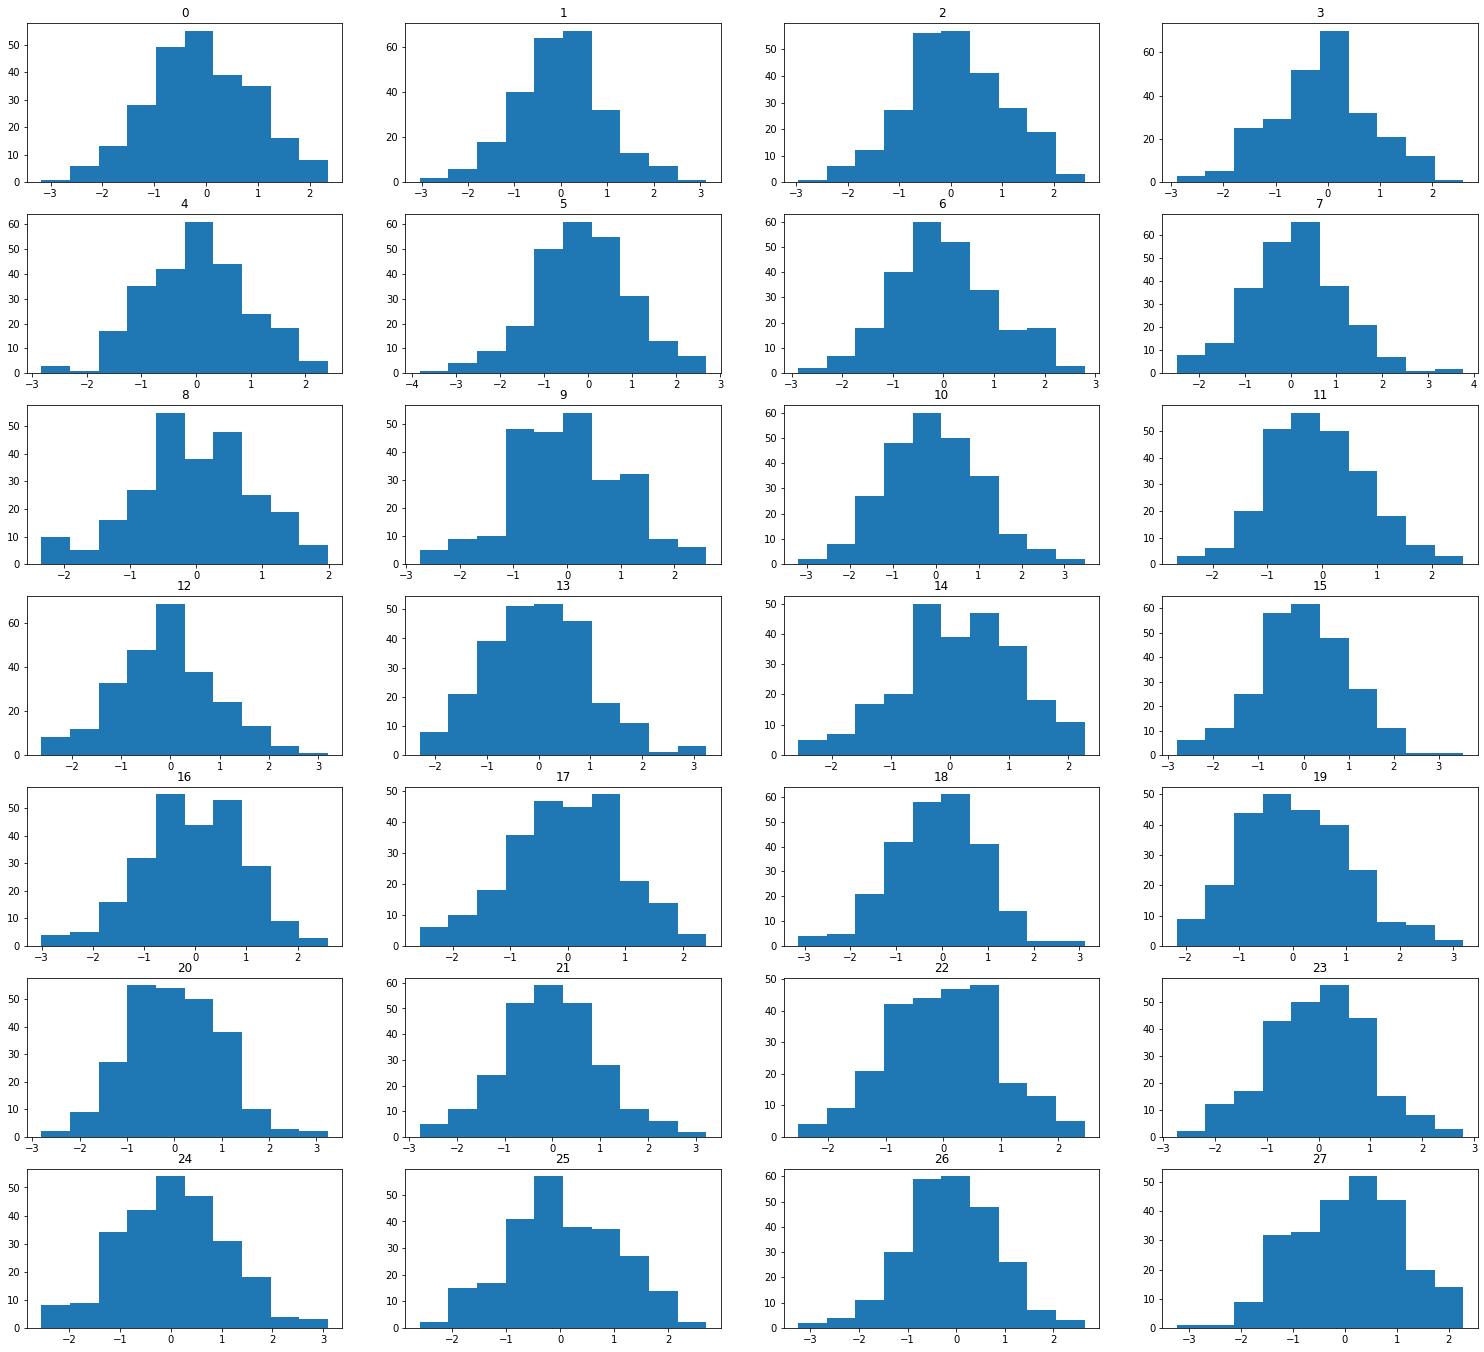

In [14]:
print('Distribution of first 28 columns')
plt.figure(figsize=(26,24))
for i,col in enumerate(list(tr.columns[0:28])):
    plt.subplot(7,4,i+1)
    plt.hist(train[col])
    plt.title(col)

In [15]:
train['target'].value_counts()
# inbalance

0.0    183
1.0     67
Name: target, dtype: int64

[stack,unstack](https://www.itread01.com/content/1545044287.html)

In [16]:
# correlation
corr = train.corr().abs().unstack().sort_values(kind='quicksort').reset_index()
corr = corr[corr['level_0']!=corr['level_1']]
corr.tail(10)
"""
可以發現 features 之間的關聯性小於 0.33754，
最高關聯性為feature target 和 127，為0.33754
我們沒有可以刪除的高度相關的特徵，另一方面，可以刪除一些與目標幾乎沒有相關性的 columns
"""

'\n可以發現 features 之間的關聯性小於 0.33754，\n最高關聯性為feature target 和 127，為0.33754\n我們沒有可以刪除的高度相關的特徵，另一方面，可以刪除一些與目標幾乎沒有相關性的 columns\n'

In [17]:
# Basic modeling 
x_train = tr
y_train = train['target']
x_test = test.drop(['id'],axis = 1)


In [18]:
from sklearn.model_selection import StratifiedKFold,RepeatedStratifiedKFold
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html
n_fold = 20;
folds = StratifiedKFold(n_splits=n_fold, shuffle=True, random_state=42)
repeated_folds = RepeatedStratifiedKFold(n_splits=20, n_repeats=20, random_state=42)

for tr_id,val_id in folds.split(x_train, y_train):
    print("TRAIN:", tr_id)
    print("VAL:", val_id)

TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  23  24  25  26  27  28  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92
  93  95  96  97  98  99 100 101 102 104 105 106 107 108 109 110 111 112
 113 114 115 116 117 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 137 138 139 140 141 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 157 158 159 160 161 162 163 164 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 183 184 185 186 187 188
 189 190 191 192 194 195 197 198 199 200 201 202 203 204 205 206 207 209
 210 211 212 213 214 215 216 217 218 219 220 221 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249]
VAL: [ 22  29  44  94 103 118 

In [19]:
from sklearn.preprocessing import StandardScaler
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train);
x_test = scaler.transform(x_test)

#### model

In [64]:
import lightgbm as lgb
import xgboost as xgb
#from catboost import CatBoostClassifier, CatBoostRegressor
import time
from sklearn.metrics import mean_squared_error,accuracy_score

def train_model(X, X_test, y, params=None, folds=folds, model_type='lgb', plot_feature_importance=False, model=None):

    oof = np.zeros(X.shape[0])#生成一個跟 X row一樣長的零矩陣
    prediction = np.zeros(X_test.shape[0])
    scores = []
    feature_importance = pd.DataFrame()#生成空矩陣
    for fold_n, (train_index, valid_index) in enumerate(folds.split(X,y)): #編號，訓練集，驗證集的序號
        print('Fold', fold_n, 'started at', time.ctime())
        
        if model_type == 'sklearn':
            X_train, X_valid = X[train_index], X[valid_index]
        else:
            X_train, X_valid = X.values[train_index], X.values[valid_index]#轉成array
        y_train, y_valid = y[train_index], y[valid_index]
        
        if model_type == 'lgb':
            model = lgb.LGBMRegressor(**params, n_estimators = 20000, nthread = 4, n_jobs = -1)#**動態參數 n_estimators=100: 要擬合的樹的棵樹，可以認爲是訓練輪數 n_jobs=1: 並行運行的多線程數 nthread [默認爲未設置的最大線程數]並行線程數
            model.fit(X_train, y_train, 
                    eval_set=[(X_train, y_train), (X_valid, y_valid)], eval_metric='rmse',
                    verbose=1000, early_stopping_rounds=200)#eval_metric: 評價指標 rmse - 均方根誤差 early_stopping_rounds: 提前結束輪數 eval_set:訓練集與測試集 verbose=1000使用詳細日誌記錄級別並將日誌記錄週期設置爲此參數的值
            
            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test, num_iteration=model.best_iteration_)
            
        if model_type == 'xgb':
            train_data = xgb.DMatrix(data=X_train, label=y_train) # 使用XGBoost的原生版本需要對數據進行轉化
            valid_data = xgb.DMatrix(data=X_valid, label=y_valid)

            watchlist = [(train_data, 'train'), (valid_data, 'valid_data')]
            model = xgb.train(dtrain=train_data, num_boost_round=20000, evals=watchlist, early_stopping_rounds=200, verbose_eval=500, params=params)
            y_pred_valid = model.predict(xgb.DMatrix(X_valid), ntree_limit=model.best_ntree_limit)
            y_pred = model.predict(xgb.DMatrix(X_test.values), ntree_limit=model.best_ntree_limit)

        if model_type == 'sklearn':
            model = model
            model.fit(X_train, y_train)
            y_pred_valid = model.predict(X_valid).reshape(-1,)
            y_pred = model.predict(X_test)
            
        if model_type == 'cat':
            model = CatBoostRegressor(iterations=20000,  eval_metric='RMSE', **params)
            model.fit(X_train, y_train, eval_set=(X_valid, y_valid), cat_features=[], use_best_model=True, verbose=False)

            y_pred_valid = model.predict(X_valid)
            y_pred = model.predict(X_test)
        
        oof[valid_index] = y_pred_valid.reshape(-1,)#reshape(-1,)轉換成一行 將對valid的預測結果存成矩陣
        scores.append(accuracy_score(y_valid, y_pred_valid))#每交叉驗證一次得到一個loss分數，一共有n_fold個值
        #scores.append(mean_squared_error(y_valid, y_pred_valid)**0.5)
        prediction += y_pred    #每次預測的結果累加 可能需要.reshape(-1,)
        
        if model_type == 'lgb':
            # feature importance
            fold_importance = pd.DataFrame()
            fold_importance["feature"] = X.columns
            fold_importance["importance"] = model.feature_importances_
            fold_importance["fold"] = fold_n + 1#第幾次交叉驗證的標誌
            feature_importance = pd.concat([feature_importance, fold_importance], axis=0)#將每次交叉驗證的結果得到的變量importance保存

    prediction /= n_fold #因爲每次預測都是累加的 故除交叉驗證的次數以取均值 
    
    print('CV mean score: {0:.4f}, std: {1:.4f}.'.format(np.mean(scores), np.std(scores)))#loss值的均值和方差
    
    if model_type == 'lgb':
        feature_importance["importance"] /= n_fold #其實不太懂爲什麼要除n_fold 後面不是取mean麼
        if plot_feature_importance:
            cols = feature_importance[["feature", "importance"]].groupby("feature").mean().sort_values(
                by="importance", ascending=False)[:50].index

            best_features = feature_importance.loc[feature_importance.feature.isin(cols)]

            plt.figure(figsize=(16, 12));
            sns.barplot(x="importance", y="feature", data=best_features.sort_values(by="importance", ascending=False));
            plt.title('LGB Features (avg over folds)');
        
            return oof, prediction, feature_importance
        return oof, prediction
    
    else:
        return oof, prediction, scores

#### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lgr = LogisticRegression(class_weight='balanced',penalty = 'l1',C=0.1,solver='liblinear')
scores = cross_val_score(lgr, x_train, y_train, cv=folds,scoring='accuracy')
print(scores.mean(),scores.std())

0.7128205128205128 0.10794384543482961


In [52]:
val_pred,pred,scores = train_model(x_train, x_test, y_train, folds=folds, model_type='sklearn',model=lgr)
print(val_pred)
print(pred)
print(scores)

Fold 0 started at Thu Mar  5 22:26:58 2020
Fold 1 started at Thu Mar  5 22:26:58 2020
Fold 2 started at Thu Mar  5 22:26:58 2020
Fold 3 started at Thu Mar  5 22:26:58 2020
Fold 4 started at Thu Mar  5 22:26:58 2020
Fold 5 started at Thu Mar  5 22:26:58 2020
Fold 6 started at Thu Mar  5 22:26:58 2020
Fold 7 started at Thu Mar  5 22:26:59 2020
Fold 8 started at Thu Mar  5 22:26:59 2020
Fold 9 started at Thu Mar  5 22:26:59 2020
Fold 10 started at Thu Mar  5 22:26:59 2020
Fold 11 started at Thu Mar  5 22:26:59 2020
Fold 12 started at Thu Mar  5 22:26:59 2020
Fold 13 started at Thu Mar  5 22:26:59 2020
Fold 14 started at Thu Mar  5 22:26:59 2020
Fold 15 started at Thu Mar  5 22:26:59 2020
Fold 16 started at Thu Mar  5 22:26:59 2020
Fold 17 started at Thu Mar  5 22:26:59 2020
Fold 18 started at Thu Mar  5 22:26:59 2020
Fold 19 started at Thu Mar  5 22:26:59 2020
CV mean score: 0.7128, std: 0.1079.
[1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 1. 1. 0. 1.

#### ELI5
[doc](https://eli5.readthedocs.io/en/latest/overview.html#installation)

In [53]:
import eli5

In [54]:
eli5.show_weights(lgr , top=50)

Weight?,Feature
+0.615,x127
+0.266,x18
+0.180,x241
+0.090,x107
+0.087,x66
+0.085,x260
+0.067,x261
+0.051,x213
+0.048,x93
+0.027,x178


In [55]:
(lgr.coef_!=0).sum()

34

In [56]:
top_features = [i[1:] for i in eli5.formatters.as_dataframe.explain_weights_df(lgr).feature if 'BIAS' not in i]
X_train = train[top_features]
X_test = test[top_features]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [57]:
model = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
oof_lr, prediction_lr, _ = train_model(X_train, X_test, y_train, params=None, model_type='sklearn', model=model)

Fold 0 started at Thu Mar  5 22:27:07 2020
Fold 1 started at Thu Mar  5 22:27:07 2020
Fold 2 started at Thu Mar  5 22:27:07 2020
Fold 3 started at Thu Mar  5 22:27:07 2020
Fold 4 started at Thu Mar  5 22:27:07 2020
Fold 5 started at Thu Mar  5 22:27:07 2020
Fold 6 started at Thu Mar  5 22:27:07 2020
Fold 7 started at Thu Mar  5 22:27:07 2020
Fold 8 started at Thu Mar  5 22:27:07 2020
Fold 9 started at Thu Mar  5 22:27:07 2020
Fold 10 started at Thu Mar  5 22:27:07 2020
Fold 11 started at Thu Mar  5 22:27:07 2020
Fold 12 started at Thu Mar  5 22:27:07 2020
Fold 13 started at Thu Mar  5 22:27:07 2020
Fold 14 started at Thu Mar  5 22:27:07 2020
Fold 15 started at Thu Mar  5 22:27:07 2020
Fold 16 started at Thu Mar  5 22:27:07 2020
Fold 17 started at Thu Mar  5 22:27:07 2020
Fold 18 started at Thu Mar  5 22:27:07 2020
Fold 19 started at Thu Mar  5 22:27:07 2020
CV mean score: 0.7247, std: 0.1337.


#### <u>Permutation importance</u>
There is also another way of using eli5 - we could have a look at permutation importance. It works in the following way: <br>

- We fit a model;
- We randomly shuffle one column of validation data and calculate the score;
- If the score dropped significantly, it means that the feature is important

<br>
You can read more about this approach 

[here](https://www.kaggle.com/dansbecker/permutation-importance)

In [60]:
from eli5.sklearn import PermutationImportance
perm = PermutationImportance(model, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, top=50)

Weight,Feature
0.0968 ± 0.0383,x0
0.0400 ± 0.0209,x25
0.0384 ± 0.0314,x1
0.0376 ± 0.0302,x32
0.0344 ± 0.0148,x31
0.0296 ± 0.0318,x33
0.0208 ± 0.0093,x26
0.0200 ± 0.0182,x27
0.0192 ± 0.0217,x30
0.0160 ± 0.0263,x28


In [61]:
top_features = [i[1:] for i in eli5.formatters.as_dataframe.explain_weights_df(perm).feature if 'BIAS' not in i]
X_train = train[top_features]
X_test = test[top_features]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [65]:
model = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
oof_lr1, prediction_lr1, _ = train_model(X_train, X_test, y_train, params=None, model_type='sklearn', model=model)

# it doesn't work well

Fold 0 started at Thu Mar  5 22:44:27 2020
Fold 1 started at Thu Mar  5 22:44:27 2020
Fold 2 started at Thu Mar  5 22:44:27 2020
Fold 3 started at Thu Mar  5 22:44:27 2020
Fold 4 started at Thu Mar  5 22:44:27 2020
Fold 5 started at Thu Mar  5 22:44:27 2020
Fold 6 started at Thu Mar  5 22:44:27 2020
Fold 7 started at Thu Mar  5 22:44:27 2020
Fold 8 started at Thu Mar  5 22:44:27 2020
Fold 9 started at Thu Mar  5 22:44:27 2020
Fold 10 started at Thu Mar  5 22:44:27 2020
Fold 11 started at Thu Mar  5 22:44:27 2020
Fold 12 started at Thu Mar  5 22:44:27 2020
Fold 13 started at Thu Mar  5 22:44:27 2020
Fold 14 started at Thu Mar  5 22:44:27 2020
Fold 15 started at Thu Mar  5 22:44:27 2020
Fold 16 started at Thu Mar  5 22:44:27 2020
Fold 17 started at Thu Mar  5 22:44:27 2020
Fold 18 started at Thu Mar  5 22:44:27 2020
Fold 19 started at Thu Mar  5 22:44:27 2020
CV mean score: 0.5439, std: 0.1335.


#### SHAP (SHapley Additive exPlanations)
- Provide explanations for a variety of models.
- [doc](https://shap.readthedocs.io/en/latest/)
- [git](https://github.com/slundberg/shap)

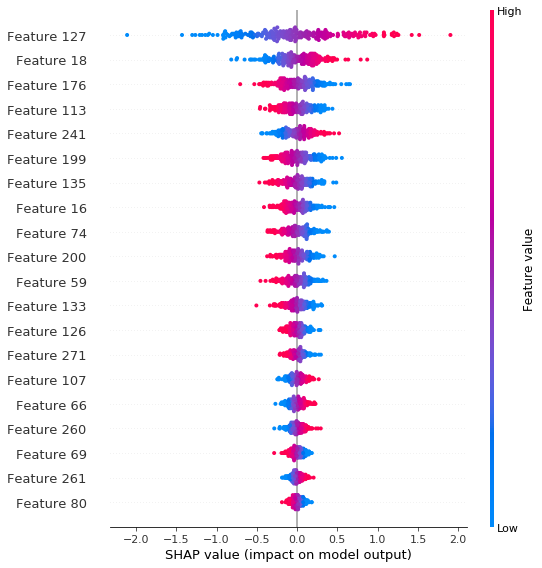

In [69]:
import shap
explainer = shap.LinearExplainer(lgr, x_train)
shap_values = explainer.shap_values(x_train)

shap.summary_plot(shap_values, x_train)

# feature 對 prediction 的影響

#### Mlxtend SequentialFeatureSelector
- Mlxtend (machine learning extensions)：[doc](http://rasbt.github.io/mlxtend/),[git](https://github.com/rasbt/mlxtend)

In [76]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sfs1 = SFS(lgr, 
           k_features=(10, 15), 
           forward=True, 
           floating=False, 
           verbose=0,
           scoring='roc_auc',
           cv=folds,
           n_jobs=-1)

sfs1 = sfs1.fit(x_train, y_train)

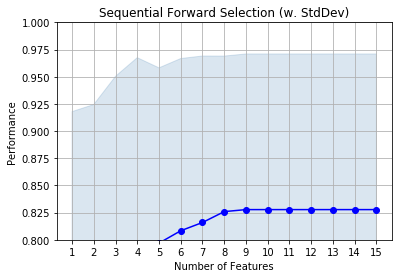

In [77]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs1.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [78]:
top_features = list(sfs1.k_feature_names_)
X_train = train[top_features]
X_test = test[top_features]
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(class_weight='balanced', penalty='l1', C=0.1, solver='liblinear')
oof_lr, prediction_lr, _ = train_model(X_train, X_test, y_train, params=None, model_type='sklearn', model=model)

Fold 0 started at Fri Mar  6 00:01:09 2020
Fold 1 started at Fri Mar  6 00:01:09 2020
Fold 2 started at Fri Mar  6 00:01:09 2020
Fold 3 started at Fri Mar  6 00:01:09 2020
Fold 4 started at Fri Mar  6 00:01:09 2020
Fold 5 started at Fri Mar  6 00:01:09 2020
Fold 6 started at Fri Mar  6 00:01:09 2020
Fold 7 started at Fri Mar  6 00:01:09 2020
Fold 8 started at Fri Mar  6 00:01:09 2020
Fold 9 started at Fri Mar  6 00:01:09 2020
Fold 10 started at Fri Mar  6 00:01:09 2020
Fold 11 started at Fri Mar  6 00:01:09 2020
Fold 12 started at Fri Mar  6 00:01:09 2020
Fold 13 started at Fri Mar  6 00:01:09 2020
Fold 14 started at Fri Mar  6 00:01:09 2020
Fold 15 started at Fri Mar  6 00:01:09 2020
Fold 16 started at Fri Mar  6 00:01:09 2020
Fold 17 started at Fri Mar  6 00:01:09 2020
Fold 18 started at Fri Mar  6 00:01:09 2020
Fold 19 started at Fri Mar  6 00:01:09 2020
CV mean score: 0.6968, std: 0.1361.


---
### Model

- Logistic Regressoion

In [84]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(solver='liblinear', max_iter=1000)
params = {
    'class_weight' : ['balanced', None],
    'penalty' : ['l2'],
    'C' : [0.001, 0.01, 0.1, 1.0, 10.0, 100.0],
    'solver': ['newton-cg', 'sag', 'lbfgs']
}
grid_search = GridSearchCV(lr, param_grid=params, cv=folds, scoring='roc_auc')
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.702962962962963
Best parameters: {'C': 10.0, 'class_weight': None, 'penalty': 'l2', 'solver': 'sag'}


In [88]:
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(max_iter=1000,**grid_search.best_params_)
oof_lr, prediction_lr, scores = train_model(x_train, x_test, y_train, params=None, model_type='sklearn', model=lr)

Fold 0 started at Fri Mar  6 01:05:31 2020
Fold 1 started at Fri Mar  6 01:05:31 2020
Fold 2 started at Fri Mar  6 01:05:31 2020
Fold 3 started at Fri Mar  6 01:05:32 2020
Fold 4 started at Fri Mar  6 01:05:32 2020
Fold 5 started at Fri Mar  6 01:05:32 2020
Fold 6 started at Fri Mar  6 01:05:33 2020
Fold 7 started at Fri Mar  6 01:05:33 2020
Fold 8 started at Fri Mar  6 01:05:33 2020
Fold 9 started at Fri Mar  6 01:05:34 2020
Fold 10 started at Fri Mar  6 01:05:34 2020
Fold 11 started at Fri Mar  6 01:05:35 2020
Fold 12 started at Fri Mar  6 01:05:35 2020
Fold 13 started at Fri Mar  6 01:05:35 2020
Fold 14 started at Fri Mar  6 01:05:36 2020
Fold 15 started at Fri Mar  6 01:05:36 2020
Fold 16 started at Fri Mar  6 01:05:36 2020
Fold 17 started at Fri Mar  6 01:05:37 2020
Fold 18 started at Fri Mar  6 01:05:37 2020
Fold 19 started at Fri Mar  6 01:05:38 2020
CV mean score: 0.6891, std: 0.1387.


- Naiive Gassian Bayes <br>
[Bayes](https://blog.csdn.net/brucewong0516/article/details/78798359)

In [89]:
from sklearn.naive_bayes import GaussianNB #Prior-> Gaussian
gnb = GaussianNB()
oof_gnb, prediction_gnb, scores_gnb = train_model(x_train, x_test, y_train, params=None, model_type='sklearn', model=gnb)

Fold 0 started at Fri Mar  6 01:06:16 2020
Fold 1 started at Fri Mar  6 01:06:16 2020
Fold 2 started at Fri Mar  6 01:06:17 2020
Fold 3 started at Fri Mar  6 01:06:17 2020
Fold 4 started at Fri Mar  6 01:06:17 2020
Fold 5 started at Fri Mar  6 01:06:17 2020
Fold 6 started at Fri Mar  6 01:06:18 2020
Fold 7 started at Fri Mar  6 01:06:18 2020
Fold 8 started at Fri Mar  6 01:06:18 2020
Fold 9 started at Fri Mar  6 01:06:18 2020
Fold 10 started at Fri Mar  6 01:06:18 2020
Fold 11 started at Fri Mar  6 01:06:18 2020
Fold 12 started at Fri Mar  6 01:06:19 2020
Fold 13 started at Fri Mar  6 01:06:19 2020
Fold 14 started at Fri Mar  6 01:06:19 2020
Fold 15 started at Fri Mar  6 01:06:19 2020
Fold 16 started at Fri Mar  6 01:06:19 2020
Fold 17 started at Fri Mar  6 01:06:19 2020
Fold 18 started at Fri Mar  6 01:06:19 2020
Fold 19 started at Fri Mar  6 01:06:20 2020
CV mean score: 0.7244, std: 0.0560.


- AdaBoost Classifier

In [90]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()

params = {'n_estimators': [5, 10, 20, 50, 100],
          'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0]
}

grid_search = GridSearchCV(abc, param_grid=params, cv=folds, scoring='roc_auc')
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.6804629629629629
Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}


In [91]:
abc = AdaBoostClassifier(**grid_search.best_params_)
oof_abc, prediction_abc, scores_abc = train_model(x_train, x_test, y_train, params=None, model_type='sklearn', model=abc)

Fold 0 started at Fri Mar  6 01:10:28 2020
Fold 1 started at Fri Mar  6 01:10:31 2020
Fold 2 started at Fri Mar  6 01:10:34 2020
Fold 3 started at Fri Mar  6 01:10:37 2020
Fold 4 started at Fri Mar  6 01:10:40 2020
Fold 5 started at Fri Mar  6 01:10:42 2020
Fold 6 started at Fri Mar  6 01:10:45 2020
Fold 7 started at Fri Mar  6 01:10:48 2020
Fold 8 started at Fri Mar  6 01:10:50 2020
Fold 9 started at Fri Mar  6 01:10:53 2020
Fold 10 started at Fri Mar  6 01:10:56 2020
Fold 11 started at Fri Mar  6 01:10:59 2020
Fold 12 started at Fri Mar  6 01:11:01 2020
Fold 13 started at Fri Mar  6 01:11:04 2020
Fold 14 started at Fri Mar  6 01:11:07 2020
Fold 15 started at Fri Mar  6 01:11:10 2020
Fold 16 started at Fri Mar  6 01:11:12 2020
Fold 17 started at Fri Mar  6 01:11:15 2020
Fold 18 started at Fri Mar  6 01:11:18 2020
Fold 19 started at Fri Mar  6 01:11:21 2020
CV mean score: 0.7247, std: 0.1217.


- Extra Trees Classifiers

In [92]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()

params = {
    'n_estimators': [10, 50, 100, 1000],
    'max_depth': [None, 3, 5, 15]
 }

grid_search = GridSearchCV(etc, param_grid=params, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

etc = ExtraTreesClassifier(**grid_search.best_params_)
oof_etc, prediction_etc, scores_etc = train_model(x_train, x_test, y_train, params=None, model_type='sklearn', model=etc)

Best score: 0.6822222222222223
Best parameters: {'max_depth': 5, 'n_estimators': 1000}
Fold 0 started at Fri Mar  6 01:14:40 2020
Fold 1 started at Fri Mar  6 01:14:44 2020
Fold 2 started at Fri Mar  6 01:14:46 2020
Fold 3 started at Fri Mar  6 01:14:48 2020
Fold 4 started at Fri Mar  6 01:14:51 2020
Fold 5 started at Fri Mar  6 01:14:53 2020
Fold 6 started at Fri Mar  6 01:14:56 2020
Fold 7 started at Fri Mar  6 01:14:58 2020
Fold 8 started at Fri Mar  6 01:15:00 2020
Fold 9 started at Fri Mar  6 01:15:02 2020
Fold 10 started at Fri Mar  6 01:15:04 2020
Fold 11 started at Fri Mar  6 01:15:07 2020
Fold 12 started at Fri Mar  6 01:15:09 2020
Fold 13 started at Fri Mar  6 01:15:11 2020
Fold 14 started at Fri Mar  6 01:15:13 2020
Fold 15 started at Fri Mar  6 01:15:15 2020
Fold 16 started at Fri Mar  6 01:15:17 2020
Fold 17 started at Fri Mar  6 01:15:20 2020
Fold 18 started at Fri Mar  6 01:15:22 2020
Fold 19 started at Fri Mar  6 01:15:42 2020
CV mean score: 0.7327, std: 0.0303.


- Random Forest Classifier

In [93]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

params = {'n_estimators': [10, 50, 100, 1000],
                  'max_depth': [None, 3, 5, 15]
                 }

grid_search = GridSearchCV(rfc, param_grid=params, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))
rfc = RandomForestClassifier(**grid_search.best_params_)
oof_rfc, prediction_rfc, scores_rfc = train_model(x_train, x_test, y_train, params=None, model_type='sklearn', model=rfc)

Best score: 0.6780555555555555
Best parameters: {'max_depth': 5, 'n_estimators': 1000}
Fold 0 started at Fri Mar  6 01:19:21 2020
Fold 1 started at Fri Mar  6 01:19:24 2020
Fold 2 started at Fri Mar  6 01:19:27 2020
Fold 3 started at Fri Mar  6 01:19:31 2020
Fold 4 started at Fri Mar  6 01:19:34 2020
Fold 5 started at Fri Mar  6 01:19:37 2020
Fold 6 started at Fri Mar  6 01:19:40 2020
Fold 7 started at Fri Mar  6 01:19:43 2020
Fold 8 started at Fri Mar  6 01:19:47 2020
Fold 9 started at Fri Mar  6 01:19:50 2020
Fold 10 started at Fri Mar  6 01:19:53 2020
Fold 11 started at Fri Mar  6 01:19:56 2020
Fold 12 started at Fri Mar  6 01:19:59 2020
Fold 13 started at Fri Mar  6 01:20:02 2020
Fold 14 started at Fri Mar  6 01:20:05 2020
Fold 15 started at Fri Mar  6 01:20:09 2020
Fold 16 started at Fri Mar  6 01:20:12 2020
Fold 17 started at Fri Mar  6 01:20:15 2020
Fold 18 started at Fri Mar  6 01:20:18 2020
Fold 19 started at Fri Mar  6 01:20:21 2020
CV mean score: 0.7327, std: 0.0303.


- Gaussian Process Classifier

In [95]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc = GaussianProcessClassifier()
oof_gpc, prediction_gpc, scores_gpc = train_model(x_train, x_test, y_train, params=None, model_type='sklearn', model=gpc)

Fold 0 started at Fri Mar  6 01:22:09 2020
Fold 1 started at Fri Mar  6 01:22:11 2020
Fold 2 started at Fri Mar  6 01:22:13 2020
Fold 3 started at Fri Mar  6 01:22:14 2020
Fold 4 started at Fri Mar  6 01:22:16 2020
Fold 5 started at Fri Mar  6 01:22:18 2020
Fold 6 started at Fri Mar  6 01:22:20 2020
Fold 7 started at Fri Mar  6 01:22:22 2020
Fold 8 started at Fri Mar  6 01:22:24 2020
Fold 9 started at Fri Mar  6 01:22:26 2020
Fold 10 started at Fri Mar  6 01:22:27 2020
Fold 11 started at Fri Mar  6 01:22:29 2020
Fold 12 started at Fri Mar  6 01:22:31 2020
Fold 13 started at Fri Mar  6 01:22:33 2020
Fold 14 started at Fri Mar  6 01:22:35 2020
Fold 15 started at Fri Mar  6 01:22:37 2020
Fold 16 started at Fri Mar  6 01:22:39 2020
Fold 17 started at Fri Mar  6 01:22:40 2020
Fold 18 started at Fri Mar  6 01:22:42 2020
Fold 19 started at Fri Mar  6 01:22:44 2020
CV mean score: 0.6548, std: 0.1196.


- Support Vector Machine

In [96]:
from sklearn.svm import SVC
svc = SVC(probability=True, gamma='scale')

params = {
    'C': [0.001, 0.01, 0.1, 1.0, 10.0],
    'kernel': ['linear', 'poly', 'rbf'],
                 }

grid_search = GridSearchCV(svc, param_grid=params, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

svc = SVC(probability=True, gamma='scale', **grid_search.best_params_)
oof_svc, prediction_svc, scores_svc = train_model(x_train, x_test, y_train, params=None, model_type='sklearn', model=svc)

Best score: 0.6980555555555554
Best parameters: {'C': 10.0, 'kernel': 'rbf'}
Fold 0 started at Fri Mar  6 01:23:05 2020
Fold 1 started at Fri Mar  6 01:23:07 2020
Fold 2 started at Fri Mar  6 01:23:08 2020
Fold 3 started at Fri Mar  6 01:23:10 2020
Fold 4 started at Fri Mar  6 01:23:12 2020
Fold 5 started at Fri Mar  6 01:23:14 2020
Fold 6 started at Fri Mar  6 01:23:16 2020
Fold 7 started at Fri Mar  6 01:23:18 2020
Fold 8 started at Fri Mar  6 01:23:19 2020
Fold 9 started at Fri Mar  6 01:23:21 2020
Fold 10 started at Fri Mar  6 01:23:23 2020
Fold 11 started at Fri Mar  6 01:23:25 2020
Fold 12 started at Fri Mar  6 01:23:27 2020
Fold 13 started at Fri Mar  6 01:23:29 2020
Fold 14 started at Fri Mar  6 01:23:30 2020
Fold 15 started at Fri Mar  6 01:23:32 2020
Fold 16 started at Fri Mar  6 01:23:34 2020
Fold 17 started at Fri Mar  6 01:23:36 2020
Fold 18 started at Fri Mar  6 01:23:38 2020
Fold 19 started at Fri Mar  6 01:23:40 2020
CV mean score: 0.7205, std: 0.0488.


- K Neighbors Classifier

In [97]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()

params = {
    'n_neighbors': [2, 3, 5, 10, 20],
    'weights': ['uniform', 'distance'],
    'leaf_size': [5, 10, 30]
}

grid_search = GridSearchCV(knc, param_grid=params, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

knc = KNeighborsClassifier(**grid_search.best_params_)
oof_knc, prediction_knc, scores_knc = train_model(x_train, x_test, y_train, params=None, model_type='sklearn', model=knc)

Best score: 0.5949074074074073
Best parameters: {'leaf_size': 5, 'n_neighbors': 20, 'weights': 'distance'}
Fold 0 started at Fri Mar  6 01:24:15 2020
Fold 1 started at Fri Mar  6 01:24:23 2020
Fold 2 started at Fri Mar  6 01:24:31 2020
Fold 3 started at Fri Mar  6 01:24:38 2020
Fold 4 started at Fri Mar  6 01:24:46 2020
Fold 5 started at Fri Mar  6 01:24:54 2020
Fold 6 started at Fri Mar  6 01:25:02 2020
Fold 7 started at Fri Mar  6 01:25:10 2020
Fold 8 started at Fri Mar  6 01:25:17 2020
Fold 9 started at Fri Mar  6 01:25:25 2020
Fold 10 started at Fri Mar  6 01:25:33 2020
Fold 11 started at Fri Mar  6 01:25:41 2020
Fold 12 started at Fri Mar  6 01:25:49 2020
Fold 13 started at Fri Mar  6 01:25:57 2020
Fold 14 started at Fri Mar  6 01:26:06 2020
Fold 15 started at Fri Mar  6 01:26:14 2020
Fold 16 started at Fri Mar  6 01:26:22 2020
Fold 17 started at Fri Mar  6 01:26:31 2020
Fold 18 started at Fri Mar  6 01:26:40 2020
Fold 19 started at Fri Mar  6 01:26:48 2020
CV mean score: 0.7327, 

- Bernoulli Naiive Bayesian

In [98]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

params = {
    'alpha': [0.0001, 1, 2, 10]
 }

grid_search = GridSearchCV(bnb, param_grid=params, cv=folds, scoring='roc_auc', n_jobs=-1)
grid_search.fit(x_train, y_train)
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

bnb = BernoulliNB(**grid_search.best_params_)
oof_bnb, prediction_bnb, scores_bnb = train_model(x_train, x_test, y_train, params=None, model_type='sklearn', model=bnb)

Best score: 0.5453703703703704
Best parameters: {'alpha': 2}
Fold 0 started at Fri Mar  6 01:27:07 2020
Fold 1 started at Fri Mar  6 01:27:08 2020
Fold 2 started at Fri Mar  6 01:27:08 2020
Fold 3 started at Fri Mar  6 01:27:08 2020
Fold 4 started at Fri Mar  6 01:27:08 2020
Fold 5 started at Fri Mar  6 01:27:08 2020
Fold 6 started at Fri Mar  6 01:27:08 2020
Fold 7 started at Fri Mar  6 01:27:09 2020
Fold 8 started at Fri Mar  6 01:27:09 2020
Fold 9 started at Fri Mar  6 01:27:09 2020
Fold 10 started at Fri Mar  6 01:27:09 2020
Fold 11 started at Fri Mar  6 01:27:09 2020
Fold 12 started at Fri Mar  6 01:27:09 2020
Fold 13 started at Fri Mar  6 01:27:10 2020
Fold 14 started at Fri Mar  6 01:27:10 2020
Fold 15 started at Fri Mar  6 01:27:10 2020
Fold 16 started at Fri Mar  6 01:27:10 2020
Fold 17 started at Fri Mar  6 01:27:10 2020
Fold 18 started at Fri Mar  6 01:27:10 2020
Fold 19 started at Fri Mar  6 01:27:10 2020
CV mean score: 0.6391, std: 0.1237.


- SGD Classifier <br>
[doc](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)